In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Load csv
df_games = pd.read_csv("partidos_cebollitas_9eada58c-fb57-4224-a3f5-6d9efc881c2e.csv")
#Creation objective variable
df_games['diferencia_goles'] = df_games['goles_local'] - df_games['goles_visitante']

#Predict variables
X = df_games[['posesion_local (%)','tiros_arco_local']]
y = df_games['diferencia_goles']

# split data : 80% train , 20%test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2  , random_state=42)

model_rl = LinearRegression()
model_rl.fit(X_train , y_train)

y_pred = model_rl.predict(X_test)


In [6]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import numpy as np

#Calculate metric
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Meean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean absolute error): {mae:.2f}")
print(f"R2 (determination coeficient): {r2:.2f}")

MSE (Meean Squared Error): 4.96
RMSE (Root Mean Squared Error): 2.23
MAE (Mean absolute error): 1.89
R2 (determination coeficient): -0.03


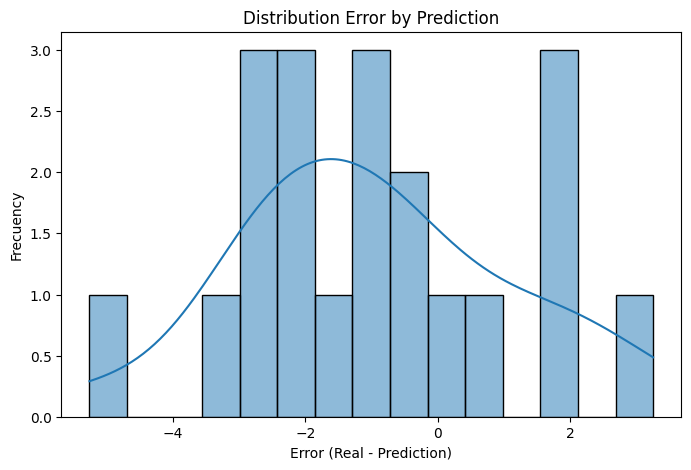

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(y_pred-y_test,bins=15, kde=True)
plt.title("Distribution Error by Prediction")
plt.xlabel("Error (Real - Prediction)")
plt.ylabel("Frecuency")
plt.show()

In [34]:
import ipywidgets as widgets

def evaluate_predicitions(threshold_mae):
    quality = "Good" if mae <= threshold_mae else "Regular or Bad"
    print(f"Your model has a MAE of {mae:.2f}, considered {quality} (umbral definido: {threshold_mae}).")
    
umbral_widget = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1.0,description='Umbral MAE: ')
widgets.interactive(evaluate_predictions,threshold_mae = umbral_widget)

NameError: name 'evaluate_predictions' is not defined